In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
url = "https://books.toscrape.com/catalogue/page-1.html"
page = requests.get(url)
page

<Response [200]>

In [3]:
page.text

'\n\n<!DOCTYPE html>\n<!--[if lt IE 7]>      <html lang="en-us" class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\n<!--[if IE 7]>         <html lang="en-us" class="no-js lt-ie9 lt-ie8"> <![endif]-->\n<!--[if IE 8]>         <html lang="en-us" class="no-js lt-ie9"> <![endif]-->\n<!--[if gt IE 8]><!--> <html lang="en-us" class="no-js"> <!--<![endif]-->\n    <head>\n        <title>\n    All products | Books to Scrape - Sandbox\n</title>\n\n        <meta http-equiv="content-type" content="text/html; charset=UTF-8" />\n        <meta name="created" content="24th Jun 2016 09:30" />\n        <meta name="description" content="" />\n        <meta name="viewport" content="width=device-width" />\n        <meta name="robots" content="NOARCHIVE,NOCACHE" />\n\n        <!-- Le HTML5 shim, for IE6-8 support of HTML elements -->\n        <!--[if lt IE 9]>\n        <script src="//html5shim.googlecode.com/svn/trunk/html5.js"></script>\n        <![endif]-->\n\n        \n            <link rel="shortcut icon" 

In [4]:
base_url = "http://books.toscrape.com/catalogue/page-{}.html"
book_data = []

# Loop through all 50 pages
for page in range(1, 51):
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    books = soup.find_all('article', class_='product_pod')

    for book in books:
        # Title from the h3 tag
        title = book.h3.a['title']
        # Relative link to book detail page
        link = "http://books.toscrape.com/catalogue/" + book.h3.a['href']
        
        # Visit book's detail page
        detail_resp = requests.get(link)
        detail_soup = BeautifulSoup(detail_resp.text, 'html.parser')

        # Extract genre from breadcrumb
        breadcrumb = detail_soup.find('ul', class_='breadcrumb')
        genre = breadcrumb.find_all('a')[2].text.strip()

        # Extract product info table
        product_table = detail_soup.find('table', class_='table table-striped')
        product_info = {row.th.text.strip(): row.td.text.strip() for row in product_table.find_all('tr')}
        
        # Book description
        desc_tag = detail_soup.find('meta', attrs={'name': 'description'})
        description = desc_tag['content'].strip() if desc_tag else ""

        # Extract rating class
        rating_class = book.p['class']
        rating = rating_class[1] if len(rating_class) > 1 else "No rating"

        # Availability
        availability = book.find('p', class_='instock availability').text.strip()

        # Price
        price = book.find('p', class_='price_color').text.strip()

        # Combine all info
        book_data.append({
              "Title": title,
              "Price": price,
              "Rating": rating,
              "Availability": availability,
              "Description": description,
              "Genre": genre,
              "Book URL": link,
              **product_info
         })


# Save to CSV
df = pd.DataFrame(book_data)
df.to_csv("all_books_data.csv", index=False)
print("Scraping complete! Data saved to all_books_data.csv")


Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

In [5]:
df = pd.read_csv("all_books_data.csv")
df

,Title,Price,Rating,Availability,Description,Genre,Book URL,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Number of reviews
0,A Light in the Attic,Â£51.77,Three,In stock (22 available),It's hard to imagine a world without A Light i...,Poetry,http://books.toscrape.com/catalogue/a-light-in...,a897fe39b1053632,Books,Â£51.77,Â£51.77,Â£0.00,0
1,Tipping the Velvet,Â£53.74,One,In stock (20 available),"""Erotic and absorbing...Written with starling ...",Historical Fiction,http://books.toscrape.com/catalogue/tipping-th...,90fa61229261140a,Books,Â£53.74,Â£53.74,Â£0.00,0
2,Soumission,Â£50.10,One,In stock (20 available),"Dans une France assez proche de la nÃ´tre, un ...",Fiction,http://books.toscrape.com/catalogue/soumission...,6957f44c3847a760,Books,Â£50.10,Â£50.10,Â£0.00,0
3,Sharp Objects,Â£47.82,Four,In stock (20 available),"WICKED above her hipbone, GIRL across her hear...",Mystery,http://books.toscrape.com/catalogue/sharp-obje...,e00eb4fd7b871a48,Books,Â£47.82,Â£47.82,Â£0.00,0
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock (20 available),From a renowned historian comes a groundbreaki...,History,http://books.toscrape.com/catalogue/sapiens-a-...,4165285e1663650f,Books,Â£54.23,Â£54.23,Â£0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Alice in Wonderland (Alice's Adventures in Won...,Â£55.53,One,In stock (1 available),NaN,Classics,http://books.toscrape.com/catalogue/alice-in-w...,cd2a2a70dd5d176d,Books,Â£55.53,Â£55.53,Â£0.00,0
996,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",Â£57.06,Four,In stock (1 available),High school student Kei Nagai is struck dead i...,Sequential Art,http://books.toscrape.com/catalogue/ajin-demi-...,bfd5e1701c862ac3,Books,Â£57.06,Â£57.06,Â£0.00,0
997,A Spy's Devotion (The Regency Spies of London #1),Â£16.97,Five,In stock (1 available),"In Englandâs Regency era, manners and elegan...",Historical Fiction,http://books.toscrape.com/catalogue/a-spys-dev...,19fec36a1dfb4c16,Books,Â£16.97,Â£16.97,Â£0.00,0
998,1st to Die (Women's Murder Club #1),Â£53.98,One,In stock (1 available),"James Patterson, bestselling author of the Ale...",Mystery,http://books.toscrape.com/catalogue/1st-to-die...,f684a82adc49f011,Books,Â£53.98,Â£53.98,Â£0.00,0


In [6]:
df.columns

Index(['Title', 'Price', 'Rating', 'Availability', 'Description', 'Genre',
       'Book URL', 'UPC', 'Product Type', 'Price (excl. tax)',
       'Price (incl. tax)', 'Tax', 'Number of reviews'],
      dtype='object')

In [7]:
df.head()

,Title,Price,Rating,Availability,Description,Genre,Book URL,UPC,Product Type,Price (excl. tax),Price (incl. tax),Tax,Number of reviews
0,A Light in the Attic,Â£51.77,Three,In stock (22 available),It's hard to imagine a world without A Light i...,Poetry,http://books.toscrape.com/catalogue/a-light-in...,a897fe39b1053632,Books,Â£51.77,Â£51.77,Â£0.00,0
1,Tipping the Velvet,Â£53.74,One,In stock (20 available),"""Erotic and absorbing...Written with starling ...",Historical Fiction,http://books.toscrape.com/catalogue/tipping-th...,90fa61229261140a,Books,Â£53.74,Â£53.74,Â£0.00,0
2,Soumission,Â£50.10,One,In stock (20 available),"Dans une France assez proche de la nÃ´tre, un ...",Fiction,http://books.toscrape.com/catalogue/soumission...,6957f44c3847a760,Books,Â£50.10,Â£50.10,Â£0.00,0
3,Sharp Objects,Â£47.82,Four,In stock (20 available),"WICKED above her hipbone, GIRL across her hear...",Mystery,http://books.toscrape.com/catalogue/sharp-obje...,e00eb4fd7b871a48,Books,Â£47.82,Â£47.82,Â£0.00,0
4,Sapiens: A Brief History of Humankind,Â£54.23,Five,In stock (20 available),From a renowned historian comes a groundbreaki...,History,http://books.toscrape.com/catalogue/sapiens-a-...,4165285e1663650f,Books,Â£54.23,Â£54.23,Â£0.00,0


In [8]:
df.shape

(1000, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Title              1000 non-null   object
 1   Price              1000 non-null   object
 2   Rating             1000 non-null   object
 3   Availability       1000 non-null   object
 4   Description        998 non-null    object
 5   Genre              1000 non-null   object
 6   Book URL           1000 non-null   object
 7   UPC                1000 non-null   object
 8   Product Type       1000 non-null   object
 9   Price (excl. tax)  1000 non-null   object
 10  Price (incl. tax)  1000 non-null   object
 11  Tax                1000 non-null   object
 12  Number of reviews  1000 non-null   int64 
dtypes: int64(1), object(12)
memory usage: 101.7+ KB


In [10]:
df.describe()

,Number of reviews
count,1000.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


#### Check for Missing values:

In [11]:
df.isnull().sum()

Title                0
Price                0
Rating               0
Availability         0
Description          2
Genre                0
Book URL             0
UPC                  0
Product Type         0
Price (excl. tax)    0
Price (incl. tax)    0
Tax                  0
Number of reviews    0
dtype: int64

#### Check Unique values:

In [12]:
df['Rating'].unique()
df['Rating'].value_counts()

Rating
One      226
Three    203
Five     196
Two      196
Four     179
Name: count, dtype: int64

In [13]:
df['Product Type'].unique()
df['Product Type'].value_counts()

Product Type
Books    1000
Name: count, dtype: int64

In [14]:
df['Availability'].unique()
df['Availability'].value_counts()

Availability
In stock (3 available)     196
In stock (14 available)    136
In stock (1 available)      98
In stock (15 available)     87
In stock (16 available)     84
In stock (5 available)      65
In stock (7 available)      53
In stock (8 available)      47
In stock (4 available)      47
In stock (6 available)      35
In stock (12 available)     34
In stock (11 available)     28
In stock (9 available)      25
In stock (19 available)     23
In stock (2 available)      14
In stock (18 available)     11
In stock (17 available)      5
In stock (13 available)      5
In stock (20 available)      4
In stock (10 available)      2
In stock (22 available)      1
Name: count, dtype: int64

In [15]:
df['UPC'].unique()
df['UPC'].value_counts()

UPC
228ba5e7577e1d49    1
a897fe39b1053632    1
90fa61229261140a    1
6957f44c3847a760    1
e00eb4fd7b871a48    1
                   ..
ce6396b0f23f6ecc    1
30a7f60cd76ca58c    1
0312262ecafa5a40    1
1dfe412b8ac00530    1
e10e1e165dc8be4a    1
Name: count, Length: 1000, dtype: int64

#### Handle Missing Values:

In [16]:
df['Description'].isnull().sum()

np.int64(2)

In [17]:
df['Description'] = df['Description'].fillna('No description available')

In [18]:
df['Description'].isnull().sum()

np.int64(0)

#### Clean Price and Rating Columns:

In [19]:
df['Price'] = df['Price'].replace({'Â': '', '£': '', '€': ''}, regex=True)
df['Price'] = df['Price'].astype(float)

In [20]:
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

In [21]:
rating = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5
}
df['Rating'] = df['Rating'].map(rating)

In [22]:
df['Price']

0      51.77
1      53.74
2      50.10
3      47.82
4      54.23
       ...  
995    55.53
996    57.06
997    16.97
998    53.98
999    26.08
Name: Price, Length: 1000, dtype: float64

In [23]:
df['Rating'].unique()

array([3, 1, 4, 5, 2])

#### what is the average book price ?

In [24]:
df['Price'].mean()

np.float64(35.07035)

##### Which Books are most expensive ?

In [25]:
df[['Title', 'Price']].sort_values(by='Price', ascending=False)

,Title,Price
648,The Perfect Play (Play by Play #1),59.99
617,Last One Home (New Beginnings #1),59.98
860,Civilization and Its Discontents,59.95
560,The Barefoot Contessa Cookbook,59.92
366,The Diary of a Young Girl,59.90
...,...,...
302,Greek Mythic History,10.23
84,Patience,10.16
716,The Tipping Point: How Little Things Can Make ...,10.02
501,The Origin of Species,10.01


### 1.Price Analysis:
#### Average, Max, and Min Price

In [26]:
average_price = df['Price'].mean()
max_price = df['Price'].max()
min_price = df['Price'].min()

print("The Average Price of books is :",average_price)
print("The Maximum Price of books is :",max_price)
print("The Minimum Price of books is :",min_price)

The Average Price of books is : 35.07035
The Maximum Price of books is : 59.99
The Minimum Price of books is : 10.0


#### Top 10 Most Expensive Books

In [27]:
Top_10 = (df.nlargest(10, 'Price')[['Title', 'Price']])

In [28]:
Top_10

,Title,Price
648,The Perfect Play (Play by Play #1),59.99
617,Last One Home (New Beginnings #1),59.98
860,Civilization and Its Discontents,59.95
560,The Barefoot Contessa Cookbook,59.92
366,The Diary of a Young Girl,59.90
657,The Bone Hunters (Lexy Vaughan & Steven Macaul...,59.71
133,Thomas Jefferson and the Tripoli Pirates: The ...,59.64
387,Boar Island (Anna Pigeon #19),59.48
393,The Improbability of Love,59.45
549,The Man Who Mistook His Wife for a Hat and Oth...,59.45


#### Top 10 Cheapest Books

In [29]:
cheapest_10 = (df.nsmallest(10, 'Price')[['Title', 'Price']])

In [30]:
cheapest_10

,Title,Price
638,An Abundance of Katherines,10.00
501,The Origin of Species,10.01
716,The Tipping Point: How Little Things Can Make ...,10.02
84,Patience,10.16
302,Greek Mythic History,10.23
558,The Fellowship of the Ring (The Lord of the Ri...,10.27
479,History of Beauty,10.29
242,The Lucifer Effect: Understanding How Good Peo...,10.40
434,"NaNo What Now? Finding your editing process, r...",10.41
274,Pet Sematary,10.56


#### Price distribution Histogram:

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

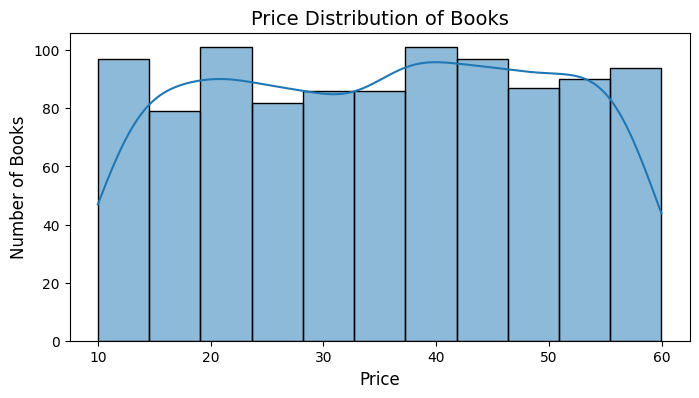

In [32]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Price'], kde=True)

plt.title('Price Distribution of Books', fontsize=14)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Number of Books', fontsize=12)
plt.show()


#### Observations:
* The majority of books are priced between 20 and 40, indicating that this is the most common price range.

* The distribution is right-skewed, meaning there are a few books priced significantly higher.

### 2.Rating Analysis:
#### Average rating overall

In [33]:
avg_rating = df['Rating'].mean()

In [34]:
avg_rating

np.float64(2.923)

#### Count of Each Rating:(Bar Chart)

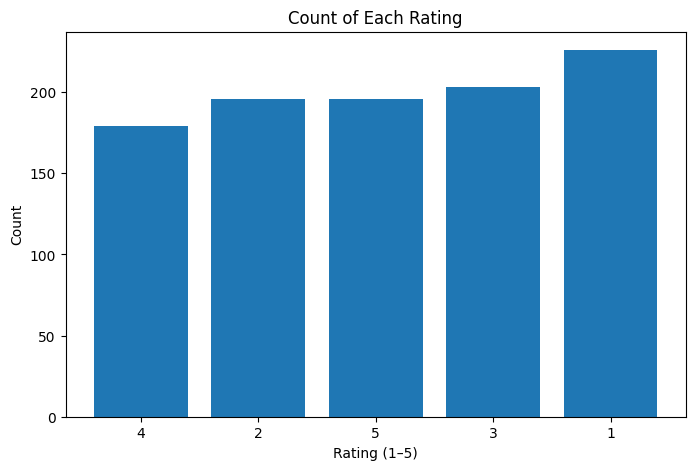

In [35]:
rating_counts = df['Rating'].value_counts().sort_values()

plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index.astype(str), rating_counts.values)
plt.title('Count of Each Rating')
plt.xlabel('Rating (1–5)')
plt.ylabel('Count')
plt.show()

#### Observations
* The most common rating is 1 star, followed closely by 3 stars.

* 4-star ratings are the least common among all.

* There are slightly more low ratings (1 star) compared to high ratings (5 stars).

#### Count of Books Per Genre:

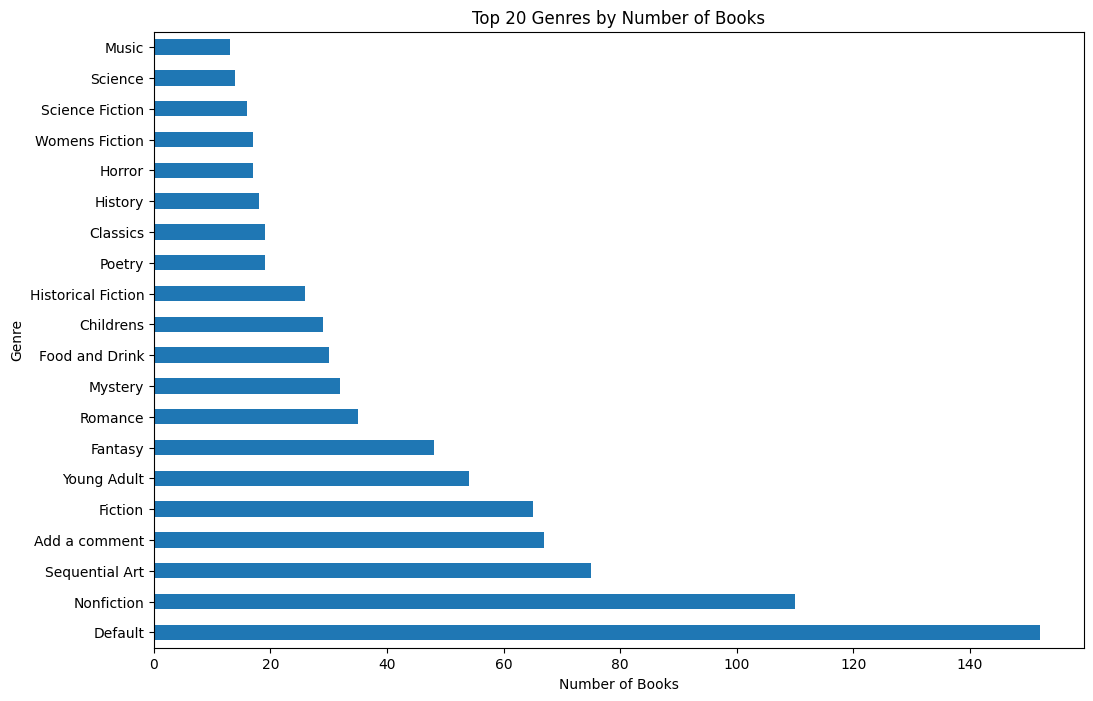

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
df['Genre'].value_counts().head(20).plot(kind='barh')
plt.title('Top 20 Genres by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Genre')
plt.show()


#### Observation:
* After removing the "Default" genre, the most common categories are Nonfiction, Sequential Art, and Fiction.
* Genres like Music, Science, and Women's Fiction have the fewest books.
* Overall, the site mainly features general and visual content.

#### Availability (In-stock & Out of Stock)

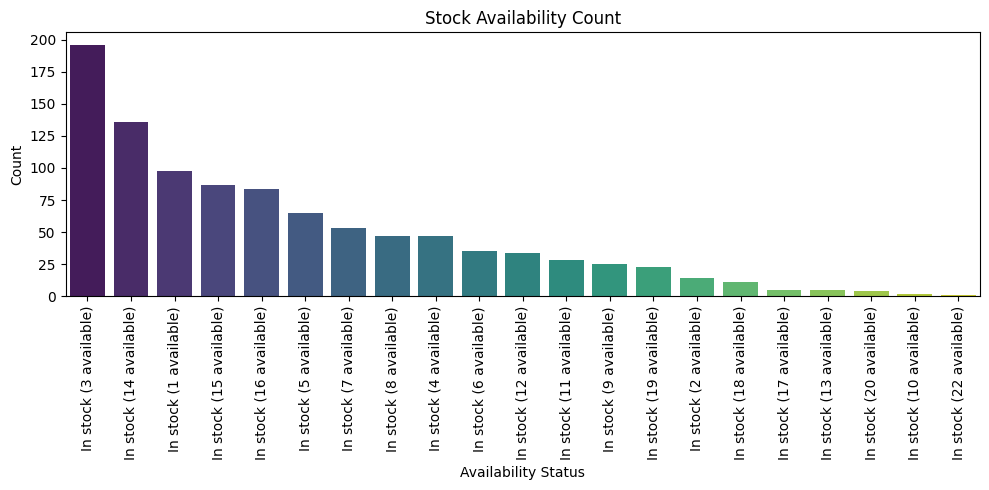

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get counts of Availability
availability_df = df['Availability'].value_counts().reset_index()
availability_df.columns = ['Status', 'Count']

# Plot with rotated x-axis
plt.figure(figsize=(10, 5))
sns.barplot(x='Status', y='Count', data=availability_df, palette='viridis')
plt.title('Stock Availability Count')
plt.xlabel('Availability Status')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels to avoid overlap
plt.tight_layout()
plt.show()


#### Observation:
* The majority of books are marked as “In stock”, indicating that most items listed on the site are currently available for purchase.

### Average Rating Vs Genre:

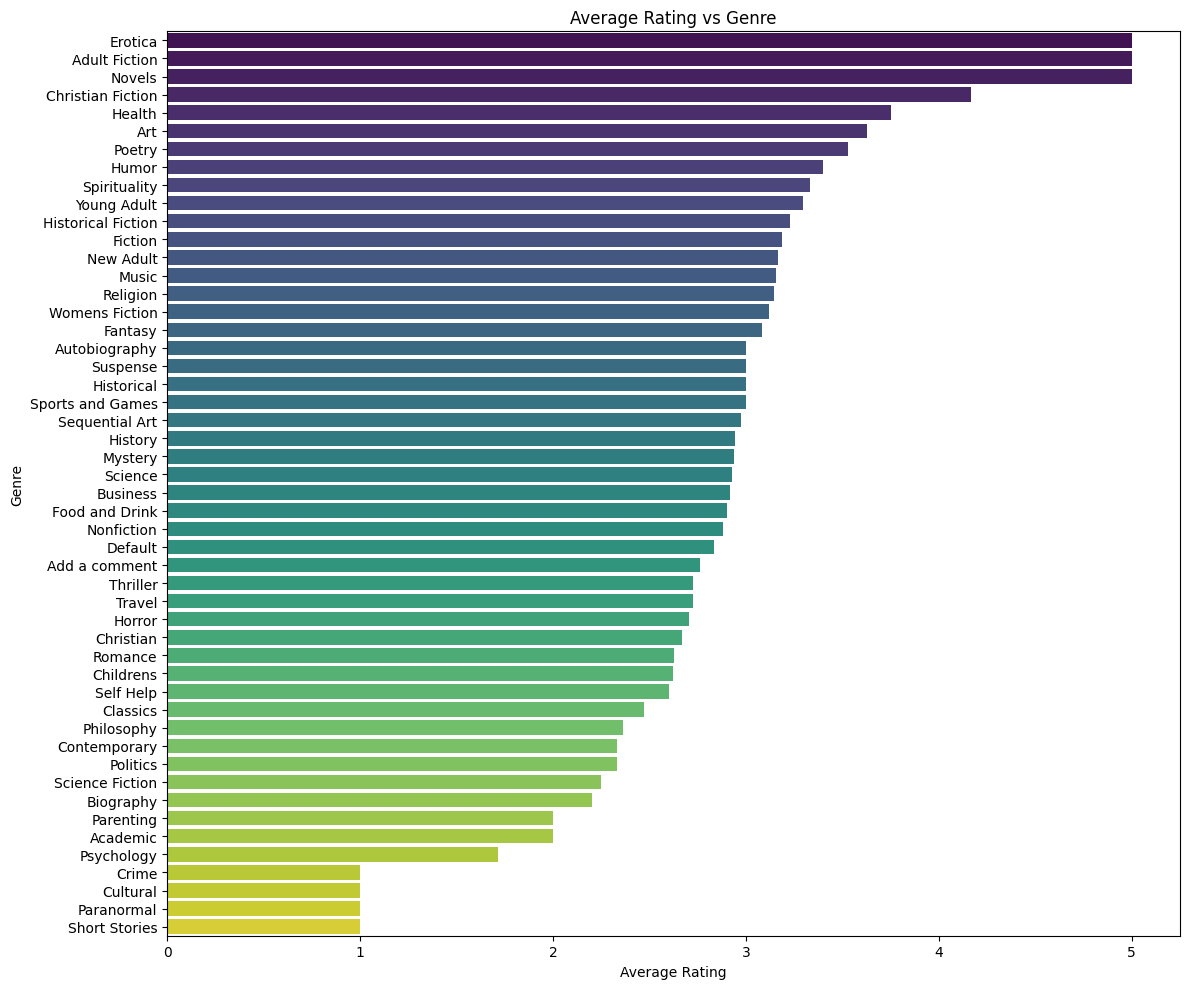

In [39]:
avg_rating = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 10))
sns.barplot(x='Rating', y='Genre', data=avg_rating, palette='viridis')

plt.title('Average Rating vs Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

#### Observation:
* Genres at the top have the highest average ratings, indicating strong reader preference.

* Genres at the bottom may reflect lower satisfaction or less popular content.

* Useful for identifying popular genres to promote or stock more.

### Number of Books In-Stock Availability Based on Genre

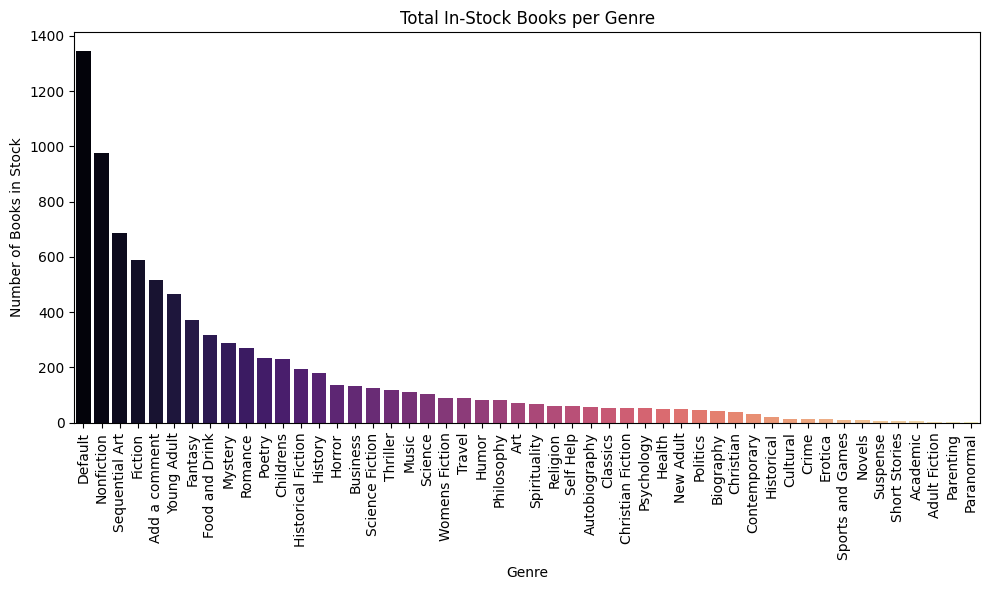

In [40]:

# Extract the number of available books
def extract_stock_count(avail):
    match = re.search(r'\((\d+)\s+available\)', avail)
    return int(match.group(1)) if match else 1  # Default to 1 if no number found

# Apply the function to create a new column
df['Stock_Count'] = df['Availability'].apply(extract_stock_count)

# Filter only 'In stock' books
in_stock_df = df[df['Availability'].str.contains('In stock', case=False)]

# Group by Genre and sum the stock counts
genre_stock = in_stock_df.groupby('Genre')['Stock_Count'].sum().sort_values(ascending=False)

# Convert to DataFrame for plotting
genre_stock_df = genre_stock.reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Stock_Count', data=genre_stock_df, palette='magma')
plt.title('Total In-Stock Books per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Books in Stock')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


#### Observation:
* Most books are marked as In stock, while only a few are Out of stock, indicating good availability overall on BooksToScrape.com.

#### Price vs Rating :

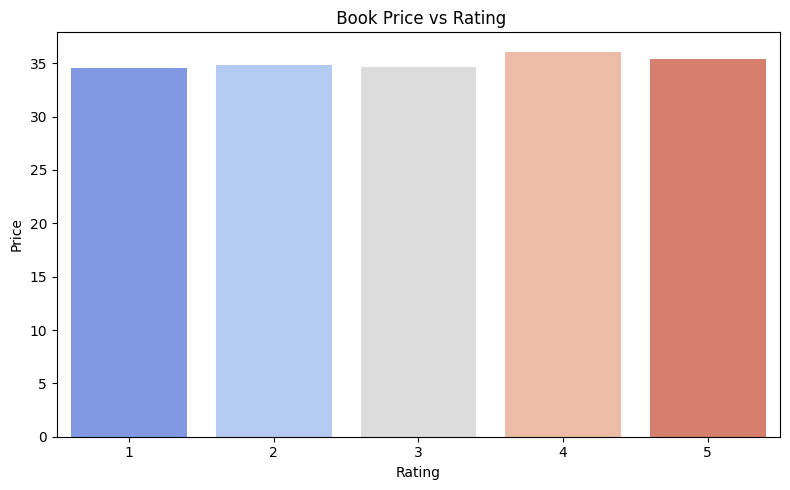

In [41]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Rating', y='Price', palette='coolwarm', errorbar = None)  # Remove error bars
plt.title(' Book Price vs Rating')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

#### Observation:
* The 4-star rating books has higher price when compared to other, and remaining all rating books have similar prices.

* Books with 1 to 3 stars and 5 stars tend to have similar average prices, showing no strong pricing pattern based on rating.

* Surprisingly, 5-star rated books don’t have the highest price, possibly indicating lower-priced quality content or promotional pricing.

### Count of Duplicate  Book Titles:

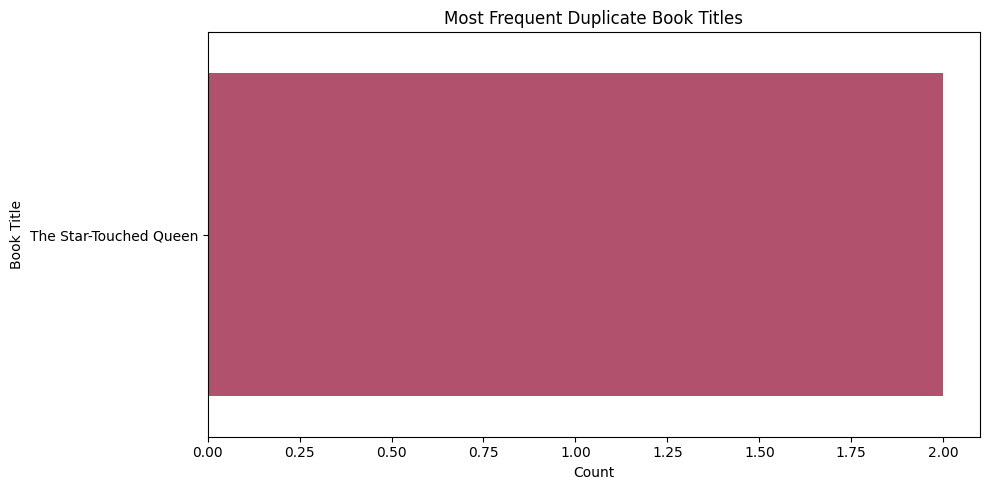

In [42]:
duplicate_counts = df['Title'].value_counts()
duplicates_only = duplicate_counts[duplicate_counts > 1]

plt.figure(figsize=(10, 5))
sns.barplot(x=duplicates_only.values, y=duplicates_only.index, palette='flare')
plt.title('Most Frequent Duplicate Book Titles')
plt.xlabel('Count')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()


#### Obseravtion:
* This confirms that nearly all book titles are unique, with only one duplicate title — The Star-Touched Queen — appearing twice. This may indicate multiple listings for the same book or different editions.

### Top 10 Highest-Rated Books:

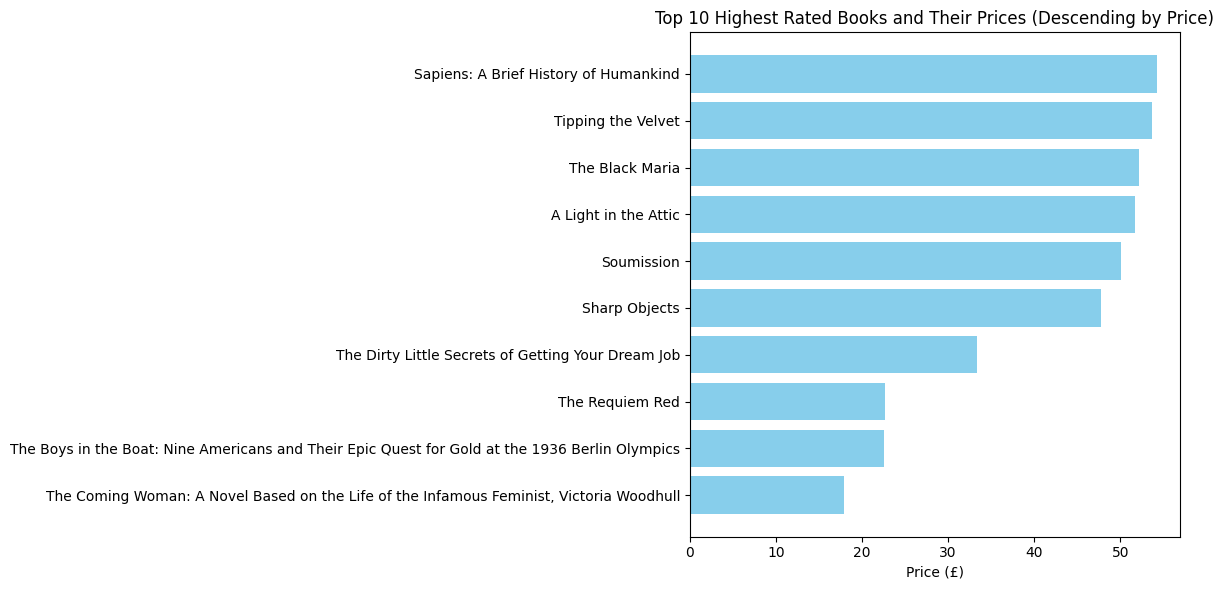

In [43]:
rating_map = {'One': 1, 'Two': 2, 'Three': 3, 'Four': 4, 'Five': 5}
df['Numeric Rating'] = df['Rating'].map(rating_map)

# Get top 10 highest rated books
top_10_books = df.sort_values(by='Numeric Rating', ascending=False).head(10).copy()

# Convert and sort by price (fix applied: force string before using .str)
top_10_books['Price (numeric)'] = (
    top_10_books['Price']
    .astype(str)                             # convert to string
    .str.replace('Â£', '', regex=False)      # remove pound symbol
    .astype(float)                           # convert to float
)

top_10_books = top_10_books.sort_values(by='Price (numeric)', ascending=False)

# Plotting
plt.figure(figsize=(12, 6))
plt.barh(top_10_books['Title'], top_10_books['Price (numeric)'], color='skyblue')
plt.xlabel('Price (£)')
plt.title('Top 10 Highest Rated Books and Their Prices (Descending by Price)')
plt.gca().invert_yaxis()  # Most expensive at top
plt.tight_layout()
plt.show()


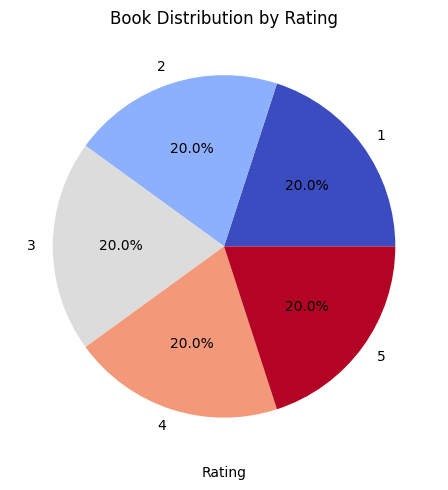

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace with df['Rating'].value_counts() if you have the dataset)
ratings = [1, 2, 3, 4, 5]
counts = [200, 200, 200, 200, 200]  # Example: 200 books per rating, total 1000

# Create the pie chart
plt.figure(figsize=(8, 5))
plt.pie(counts, labels=ratings, autopct='%1.1f%%', colors=plt.cm.coolwarm(np.linspace(0, 1, len(ratings))))
plt.title('Book Distribution by Rating')
plt.xlabel('Rating')  # Note: Pie charts typically don't use xlabel, but included for consistency with your barplot
plt.ylabel('')  # Empty ylabel as pie charts don't use y-axis labels
plt.tight_layout()
plt.show()